# Initialization

## Importing libraries

As a first step we load the different libraries we are going to use, in this simple example we only need tensorflow (keras) and numpy

In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import backend as K
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense,Input
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import BatchNormalization,Dropout,Flatten, MaxPooling2D, Conv2D
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ThresholdedReLU,ReLU
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import random

## Data related parameters

We define a few parameters related to the data we are going to use

In [2]:
# Parameters of the model 
num_classes = 10 # number of output class (1-9)
input_shape = (32, 32, 1) # shape of the input, we have 32 x 32 pixel size images of each number


## Loading Data

Next step is to actually load the MNIST database and perform some simple pre-process in order to introduce it to the neural network


In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data() # we load the data from keras.datsets library

# Normalize pixel values to be between 0 and 1
## Normalization ##
# Scale images to the [0, 1] range
x_train = x_train / 255 # images are encoded with up to 256 so to normalize from 0-1 we simply divide
x_test = x_test / 255

print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


## Visualize the dataset

Let's see a few examples by eye now.

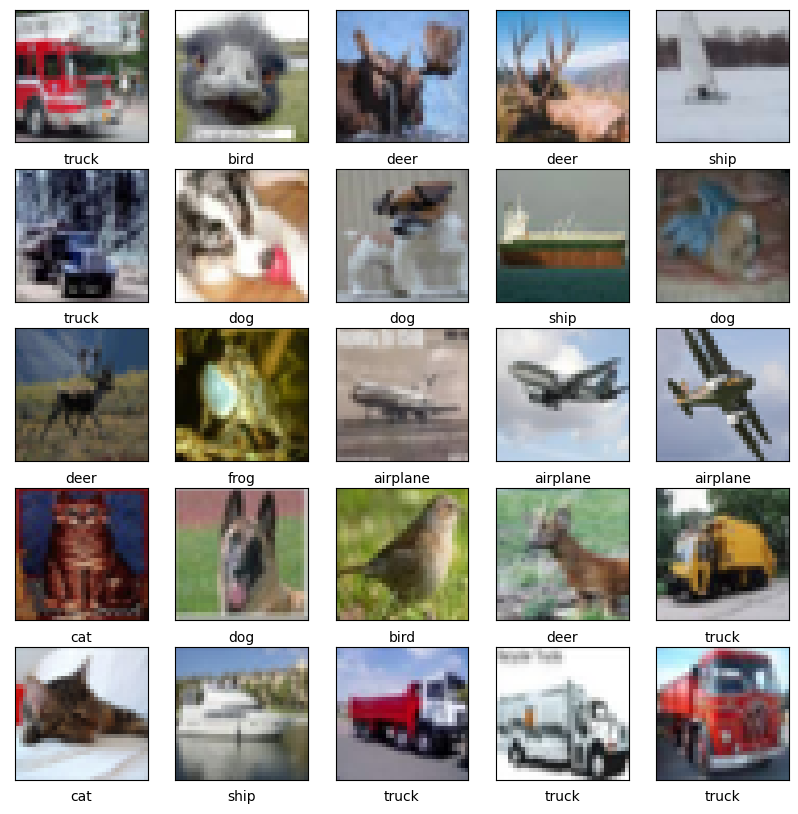

In [4]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    random_image = random.randint(1, 50000)
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[random_image])
    plt.xlabel(class_names[y_train[random_image][0]])
plt.show()

## Model related parameters

Here we define hyperparameters that are going to be used in the model and training below


In [6]:
from tensorflow.keras.applications.vgg16 import VGG16

base_model = VGG16(input_shape = (32, 32, 3), # Shape of our images
include_top = False, # Leave out the last fully connected layer
weights = 'imagenet')
for layer in base_model.layers:
    layer.trainable = False

In [7]:
# Flatten the output layer to 1 dimension
x = layers.Flatten()(base_model.output)

# Add a fully connected layer with 512 hidden units and ReLU activation
x = layers.Dense(512, activation='relu')(x)

# Add a dropout rate of 0.25
x = layers.Dropout(0.25)(x)

# Add a fully connected layer with 256 hidden units and ReLU activation
x = layers.Dense(256, activation='relu')(x)

# Add a dropout rate of 0.25
x = layers.Dropout(0.25)(x)

# Add a final sigmoid layer with 1 node for classification output
x = layers.Dense(num_classes, activation='softmax')(x)

model = tf.keras.models.Model(base_model.input, x)

model.compile(optimizer = "adam", loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics = ['acc'])

In [13]:
model.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)        

## Example of Training proccedure


Let's now train our model for a few epochs

In [10]:
history = model.fit(x_train, y_train, batch_size = 256, epochs = 10)

Epoch 1/10
196/196 [==============================] - 107s 547ms/step - loss: 0.9128 - acc: 0.6805
Epoch 2/10
196/196 [==============================] - 148s 758ms/step - loss: 0.8891 - acc: 0.6858
Epoch 3/10
196/196 [==============================] - 130s 661ms/step - loss: 0.8709 - acc: 0.6916
Epoch 4/10
196/196 [==============================] - 143s 728ms/step - loss: 0.8492 - acc: 0.7012
Epoch 5/10
196/196 [==============================] - 177s 903ms/step - loss: 0.8293 - acc: 0.7067
Epoch 6/10
196/196 [==============================] - 159s 811ms/step - loss: 0.8096 - acc: 0.7131
Epoch 7/10
196/196 [==============================] - 129s 657ms/step - loss: 0.7845 - acc: 0.7206
Epoch 8/10
196/196 [==============================] - 130s 662ms/step - loss: 0.7682 - acc: 0.7294
Epoch 9/10
196/196 [==============================] - 130s 665ms/step - loss: 0.7488 - acc: 0.7331
Epoch 10/10
196/196 [==============================] - 128s 655ms/step - loss: 0.7320 - acc: 0.7412


## Evaluation

To evulate our model we need to see how well it performs to unknown data (test set):

In [11]:
score = model.evaluate(x_test, y_test, verbose=1)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 1.1390246152877808
Test accuracy: 0.6297000050544739


In [20]:
predictions = model.predict(x_test)
predictions_binary = np.argmax(predictions, axis=1)
y_test_binary = np.transpose(y_test)

cr = classification_report(y_test[:,] , predictions_binary)
cm = confusion_matrix(y_test[:,] , predictions_binary)
print(cm)
print(cr)

313/313 [==============================] - 35s 113ms/step
[[718  26  61  15  10  12   8  20  94  36]
 [ 38 733  15  32   9  13  15  14  37  94]
 [ 68  15 546  53 100  63  97  31  13  14]
 [ 23  50  78 404  50 203  86  32  22  52]
 [ 22  14 108  53 544  45  80  84  32  18]
 [ 15  17  62 144  55 589  30  58   6  24]
 [ 10  26  66  81  62  71 653   7   9  15]
 [ 25  14  50  30  47  77  11 692  10  44]
 [ 79  55  14  18  10   7   5   8 741  63]
 [ 52 126  18  29  12  25  17  27  42 652]]
              precision    recall  f1-score   support

           0       0.68      0.72      0.70      1000
           1       0.68      0.73      0.71      1000
           2       0.54      0.55      0.54      1000
           3       0.47      0.40      0.43      1000
           4       0.61      0.54      0.57      1000
           5       0.53      0.59      0.56      1000
           6       0.65      0.65      0.65      1000
           7       0.71      0.69      0.70      1000
           8       0.74 